<a href="https://colab.research.google.com/github/mikee254/mikee254/blob/main/scikit_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION TO SCIKIT LEARN

what we are going to cover
0. an end to end scikit learn workflow
1. getting data ready
2. choose the right estimator or algorith for our problems
3. fit the model
4. evaluate a model
5. improve a model
6. save and load a trained model
7. putting it all together

## 0. an end to end scikit learn workflow

In [1]:
# get the data ready
import numpy as np
import pandas as pd
heartdisease=pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heartdisease


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
x=heartdisease.drop("target",axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [3]:
y=heartdisease["target"]
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [4]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [5]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [6]:
x.shape[0] * 0.8

242.4

In [7]:
242+61

303

In [8]:
len(heartdisease)

303

### 1.1 Make sure its all numerical

In [9]:
carsales=pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended.csv")
carsales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [10]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [11]:
len(carsales)

1000

In [12]:
carsales.dtypes

,0
Make,object
Colour,object
Odometer (KM),int64
Doors,int64
Price,int64


In [13]:
# split into X/Y
x=carsales.drop("Price",axis=1)
y=carsales["Price"]

# split into training and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [14]:
# build machine learning model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Honda'

In [ ]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [ ]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [ ]:
# lets refit the model
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
model.score(x_test,y_test)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# create x ( features matrix)
x=heartdisease.drop("target",axis=1)
# create y (labels)
y=heartdisease["target"]

In [ ]:
# 2. choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100) # Create an instance of the classifier

# we will keep the default hyperparameters
clf.get_params() # Call get_params() on the instance

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# 3. fit the model to the training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
clf.fit(x_train,y_train);
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2


In [ ]:
# make a prediction
# Assuming 'x' has 13 features, use the same number of features for prediction
sample_data = x.sample(1).values[0]  # Take a sample row from the original data
y_label = clf.predict(sample_data.reshape(1, -1))
print(y_label)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3


In [ ]:
y_preds=clf.predict(x_test)
y_preds

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
y_test

,target
231,0
193,0
136,1
91,1
144,1
...,...
65,1
160,1
8,1
269,0


In [ ]:
# 4. Evaluate the model on the training data and test data
clf.score(x_train, y_train)

1.0

In [ ]:
clf.score(x_test,y_test)

0.8360655737704918

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [ ]:
confusion_matrix(y_test,y_preds)

array([[22,  6],
       [ 4, 29]])

In [ ]:
accuracy_score(y_test, y_preds)

0.8360655737704918

In [ ]:
# 5. improve a model
#try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set: {clf.score(x_test,y_test)*100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 77.05%

Trying model with 20 estimators...
Model accuracy on test set: 78.69%

Trying model with 30 estimators...
Model accuracy on test set: 88.52%

Trying model with 40 estimators...
Model accuracy on test set: 83.61%

Trying model with 50 estimators...
Model accuracy on test set: 83.61%

Trying model with 60 estimators...
Model accuracy on test set: 83.61%

Trying model with 70 estimators...
Model accuracy on test set: 88.52%

Trying model with 80 estimators...
Model accuracy on test set: 86.89%

Trying model with 90 estimators...
Model accuracy on test set: 81.97%



In [ ]:
# 6. save a model and load it
import pickle
pickle.dump(clf,open("random_forest_model_1.pk1","wb"))

In [ ]:
loaded_model=pickle.load(open("random_forest_model_1.pk1","rb"))
loaded_model.score(x_test,y_test)

0.819672131147541

### 1.2 What if there were missing values?

1. fill them with some value (also known as imputation)
2. remove the samples with missing data altogether

In [ ]:
# import car sales missing data
carsalesmissing=pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
carsalesmissing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [ ]:
carsalesmissing.isna().sum()

,0
Make,49
Colour,50
Odometer (KM),50
Doors,50
Price,50


In [ ]:
# Create X and Y
x=carsalesmissing.drop("Price",axis=1)
y=carsalesmissing["Price"]

In [ ]:
# lets try and convert our data to numbers
# turn categories in to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [ ]:
carsalesmissing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [ ]:
carsalesmissing["Doors"].value_counts()

,count
Doors,
4.0,811
5.0,75
3.0,64


### 1: fill missing data with pandas

In [ ]:
carsalesmissing["Make"].fillna("missing", inplace=True)
# Fill the "colour" column
carsalesmissing["Colour"].fillna("missing", inplace=True)
# Fill the "Odometer (KM)" column
carsalesmissing["Odometer (KM)"].fillna(carsalesmissing["Odometer (KM)"].mean(),inplace=True)
# Fill the "Doors" column
carsalesmissing["Doors"].fillna(4,inplace=True)

In [ ]:
# check our dataframe again
carsalesmissing.isna().sum()

,0
Make,0
Colour,0
Odometer (KM),0
Doors,0
Price,50


In [ ]:
# Remove rows with missing price value
carsalesmissing.dropna(inplace=True)
carsalesmissing.isna().sum()

,0
Make,0
Colour,0
Odometer (KM),0
Doors,0
Price,0


In [ ]:
len(carsalesmissing)

950

In [ ]:
x=carsalesmissing.drop("Price",axis=1)
y=carsalesmissing["Price"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [ ]:
carsales=pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
carsales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [ ]:
len(carsales)

1000

In [ ]:
carsales.dtypes

,0
Make,object
Colour,object
Odometer (KM),float64
Doors,float64
Price,float64


In [ ]:
# Split into X/Y
X=carsales.drop("Price",axis=1)
y=carsales["Price"]


In [ ]:
# Split into training and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2);


In [ ]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Honda'

In [ ]:
#Turn  the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(X)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(transformed_x)

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
...,...
995,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
996,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 11)\t1.0\n..."
997,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
998,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."


In [ ]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [ ]:
dummies=pd.get_dummies(x[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Make_missing,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Colour_missing
0,4.0,False,True,False,False,False,False,False,False,False,True,False
1,5.0,True,False,False,False,False,False,True,False,False,False,False
2,4.0,False,True,False,False,False,False,False,False,False,True,False
3,4.0,False,False,False,True,False,False,False,False,False,True,False
4,3.0,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.0,False,False,False,True,False,True,False,False,False,False,False
996,3.0,False,False,False,False,True,False,False,False,False,True,False
997,4.0,False,False,True,False,False,False,True,False,False,False,False
998,4.0,False,True,False,False,False,False,False,False,False,True,False


In [ ]:
#Turn  the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer  # Import SimpleImputer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()

# Create an imputer to handle missing values before one-hot encoding
imputer = SimpleImputer(strategy='most_frequent')  # Replace missing values with the most frequent value
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

# Apply the imputer to the categorical features before transformation
X[categorical_features] = imputer.fit_transform(X[categorical_features])

transformed_x=transformer.fit_transform(X)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [ ]:
# Lets refit the model
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model.fit(X_train,y_train)

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
#Turn  the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer  # Import SimpleImputer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()

# Create an imputer to handle missing values before one-hot encoding
imputer = SimpleImputer(strategy='most_frequent')  # Replace missing values with the most frequent value

# Create the ColumnTransformer, applying the imputer *within* the pipeline
transformer = ColumnTransformer([
    ("one_hot",
     Pipeline(steps=[('imputer', imputer), ('onehot', one_hot)]),
     categorical_features)
], remainder="passthrough")

transformed_x = transformer.fit_transform(X)
transformed_x

NameError: name 'Pipeline' is not defined

In [ ]:
#Turn  the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer  # Import SimpleImputer
from sklearn.pipeline import Pipeline # Import Pipeline

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()

# Create an imputer to handle missing values before one-hot encoding
imputer = SimpleImputer(strategy='most_frequent')  # Replace missing values with the most frequent value

# Create the ColumnTransformer, applying the imputer *within* the pipeline
transformer = ColumnTransformer([
    ("one_hot",
     Pipeline(steps=[('imputer', imputer), ('onehot', one_hot)]),
     categorical_features)
], remainder="passthrough")

transformed_x = transformer.fit_transform(X)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [ ]:
model.score(X_test,y_test)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Lets refit the model
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model.fit(X_train,y_train) # Make sure to fit the model before scoring

model.score(X_test,y_test)

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

MAKE SURE ITS ALL NUMERICAL

In [ ]:
carsales=pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
carsales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [ ]:
carsales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [ ]:
carsales.dtypes

,0
Make,object
Colour,object
Odometer (KM),float64
Doors,float64
Price,float64


In [ ]:
# Split into X/Y
X=carsales.drop("Price",axis=1)
y=carsales["Price"]

In [ ]:
# Split into training and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2);

In [ ]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Honda'

# Turn the categories into numbers

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(carsales)
transformed_x

<1000x17 sparse matrix of type '<class 'numpy.float64'>'
	with 5000 stored elements in Compressed Sparse Row format>

In [ ]:
carsales ['Doors'].value_counts()

,count
Doors,
4.0,811
5.0,75
3.0,64


In [ ]:
pd.DataFrame(transformed_x)

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
...,...
995,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
996,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 11)\t1.0\n..."
997,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
998,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."


In [ ]:
dummies=pd.get_dummies(carsales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4.0,False,True,False,False,False,False,False,False,True
1,5.0,True,False,False,False,False,True,False,False,False
2,4.0,False,True,False,False,False,False,False,False,True
3,4.0,False,False,False,True,False,False,False,False,True
4,3.0,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4.0,False,False,False,True,True,False,False,False,False
996,3.0,False,False,False,False,False,False,False,False,True
997,4.0,False,False,True,False,False,True,False,False,False
998,4.0,False,True,False,False,False,False,False,False,True


In [ ]:
# Lets refit the model
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model.fit(X_train,y_train)


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
model.score(X_test,y_test)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### 1.2 what if there were missing values

1fill them with some value (also known as


imputation)
2remove the samples with missing data altogether

In [ ]:
# import carsales missing data
carsalesmissing=pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
carsalesmissing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [ ]:
carsalesmissing.isna().sum()

,0
Make,49
Colour,50
Odometer (KM),50
Doors,50
Price,50


In [ ]:
# Create X & Y
X=carsalesmissing.drop("Price",axis=1)
y=carsalesmissing["Price"]

In [ ]:
# Lets try and convert our data into numbers
#Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

In [ ]:
carsalesmissing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Fill missing data with pandas

In [ ]:
# Fill the "Make" column
carsalesmissing["Make"].fillna("missing", inplace=True)
# Fill the "Colour" column
carsalesmissing["Colour"].fillna("missing", inplace=True)
# Fill the "Odometer (KM)" column
carsalesmissing["Odometer (KM)"].fillna(carsalesmissing["Odometer (KM)"].mean(),inplace=True)
# Fill the "Doors" column
carsalesmissing["Doors"].fillna(4,inplace=True)

In [ ]:
# check our dataframe again
carsalesmissing.isna().sum()

,0
Make,0
Colour,0
Odometer (KM),0
Doors,0
Price,50


In [ ]:
# Remove rows with missing price value
carsalesmissing.dropna(inplace=True)
carsalesmissing.isna().sum()

,0
Make,0
Colour,0
Odometer (KM),0
Doors,0
Price,0


In [ ]:
len(carsalesmissing)

950

In [ ]:
X=carsalesmissing.drop("Price",axis=1)
y=carsalesmissing["Price"]

In [ ]:
# Lets try and convert our data into numbers
#Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(carsalesmissing)
transformed_x

<950x17 sparse matrix of type '<class 'numpy.float64'>'
	with 4750 stored elements in Compressed Sparse Row format>

In [ ]:
### Fill missing values with scikit learn
carsalesmissing=pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
carsalesmissing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [ ]:
carsalesmissing.isna().sum()

,0
Make,49
Colour,50
Odometer (KM),50
Doors,50
Price,50


In [ ]:
carsalesmissing.dropna(subset=["Price"],inplace=True)
carsalesmissing.isna().sum()

,0
Make,47
Colour,46
Odometer (KM),48
Doors,47
Price,0


In [ ]:
# Split into X & Y
X=carsalesmissing.drop("Price",axis=1)
y=carsalesmissing["Price"]

In [ ]:
# Fill missing values with scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# Fill categorical values with 'missing' & numerical values with mean
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

In [ ]:
# Define columns
cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

In [ ]:
# Create an imputer (something) that fills missing data)
imputer=ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])

In [ ]:
# Transform the data
filledX=imputer.fit_transform(X)
filledX

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [ ]:
carsalesfilled=pd.DataFrame(filledX,columns=["Make","Colour","Doors","Odometer (KM)"])
carsalesfilled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [ ]:
carsalesfilled.isna().sum()

,0
Make,0
Colour,0
Doors,0
Odometer (KM),0


In [ ]:
# Lets try and convert our data into numbers
#Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(carsalesfilled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [ ]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

In [ ]:
len(carsalesfilled),len(carsales)

(950, 1000)

## 2 Choosing the right estimator/algorithm for our problem

**scikit**-learn uses estimator as another term for machine learning model or algorithm

**Classification** - predicting whether a sample is one thing or another

**Regression** - predicting a number

### 2.1 Picking an ML model for a regressioin problem

In [ ]:
# Import boston housing dataset
from sklearn.datasets import load_boston
boston=load_boston()
boston;

CHOOSING AN ESTIMATOR FOR A CLASSIFICATION PROBLEM

In [ ]:
import pandas as pd # Import the pandas library and give it the alias 'pd'

heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
len(heart_disease)

303

consulting the map it says to try linear SVC

In [ ]:
# import the linearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
import numpy as np
np.random.seed(42)

# Make the data
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate the linearSVC
clf = LinearSVC()
clf.fit(x_train,y_train)

# Check the score of the linearSVC
clf.score(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [ ]:
#import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
import numpy as np
np.random.seed(42)

# Make the data
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate the Randomforestclassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# Check the score of theRandomforestclassifier
clf.score(x_test,y_test)

0.8524590163934426

NOTE:
1. if you have structured data use ensemble methods
2. if you have unstructured data use deep learning or transfer learning

 3.**Fit the model/algorithm and use it to make predictions on our data**

In [ ]:
#import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
import numpy as np
np.random.seed(42)

# Make the data
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Instantiate the Randomforestclassifier
#clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# Check the score of theRandomforestclassifier
clf.score(x_test,y_test)

0.8524590163934426

In [ ]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [ ]:
y.tail()

,target
298,0
299,0
300,0
301,0
302,0


###3. MAKE PREDICTIONS USING A MACHINE LEARNING MODEL

# there are two ways to make predictions
1. predict()
2. predictproba()

In [ ]:
# use a trained model to make predictions
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [ ]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
y_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


In [ ]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
# compare predictions to truth labels to evaluate the model
y_preds=clf.predict(x_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [ ]:
clf.score(x_test,y_test)

0.8524590163934426

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

# make predictions with predictproba()


In [ ]:
# predictproba returns probabilities of a classification label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [ ]:
# lets predict on the same data
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1])

In [ ]:
heart_disease["target"].value_counts()

,count
target,
1,165
0,138


predict() can also be used on regression models to predict numerical values

#### EVALUATING A MACHINE LEARNING MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

there are 3 ways to evaluate a model
1. estimator score method
2. the scoring parameter
3. problem specific metric

In [ ]:
 ## evaluating using estimator score method
 clf.score(x_test,y_test)

0.8524590163934426

Evaluating using the scoring parameter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train);

In [ ]:
clf.score(x_test,y_test)

0.8524590163934426

In [ ]:
cross_val_score(clf,x,y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [ ]:
cross_val_score(clf,x,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [ ]:
np.random.seed(42)
# single training and test split score
clf_single_score = clf.score(x_test,y_test)
# take the mean of 5-fold cross-validation score
clf_cross_val_score=np.mean(cross_val_score(clf,x,y,cv=5))

# compare the two
clf_single_score,clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [ ]:
# scoring parameter set to none by default
cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [ ]:
# default scoring parameter of classifier = mean accuracy
clf.score(x_test,y_test)

0.8524590163934426

##### CLASSIFICATION MODEL EVALUATION METRICS
1. accuracy
2. confusion matrix
3. classification report
4. area under ROC curve

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train);
cross_val_score(clf,x,y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [ ]:
np.mean(cross_val_score(clf,x,y,cv=5))

0.8183606557377049

In [ ]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score(clf,x,y,cv=5))*100:.2f}%")


Heart Disease Classifier Cross-Validated Accuracy: 81.83%


## AREA UNDER THE RECEIVER OPERATING CHARACTERISTICS CURVE (AUC/ROC)

1.area under curve (AUC)
2.ROC curve




 ROC curves are a comparison of a models true positive rate (tpr) versus a models false positive rate (fpr)
 true positive = models predict 1 when truth is 1
 false positive= model predicts 1 when truth is 0
 false negative= model predicts 0 when truth is 1
 true negative= model predicts 0 when truth is 0

In [ ]:
# create X_test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [ ]:
from sklearn.metrics import roc_curve
# make predictions with probabilities
y_probs=clf.predict_proba(x_test)
y_probs[:10],len(y_probs)


(array([[0.07, 0.93],
        [0.03, 0.97],
        [0.07, 0.93],
        [1.  , 0.  ],
        [0.01, 0.99],
        [1.  , 0.  ],
        [0.17, 0.83],
        [0.98, 0.02],
        [0.85, 0.15],
        [0.99, 0.01]]),
 61)

In [ ]:
y_probs_positive= y_probs[:,1]
y_probs_positive[:10]

array([0.93, 0.97, 0.93, 0.  , 0.99, 0.  , 0.83, 0.02, 0.15, 0.01])

In [ ]:
# calculate fpr, tpr and thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

In [ ]:
# check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03846154, 0.03846154, 0.07692308, 0.15384615,
       0.34615385, 0.42307692, 0.61538462, 0.76923077, 0.80769231,
       0.88461538, 1.        ])

In [ ]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
  """
  Plots a ROC curve
  """
  # plot roc curve
  plt.plot(fpr,tpr,color="red",label="ROC") #This line was incorrectly indented.

  #plot line with no predictive power (baseline)
  plt.plot([0,1],[0,1],color="green",linestyle="--",label="guessing")

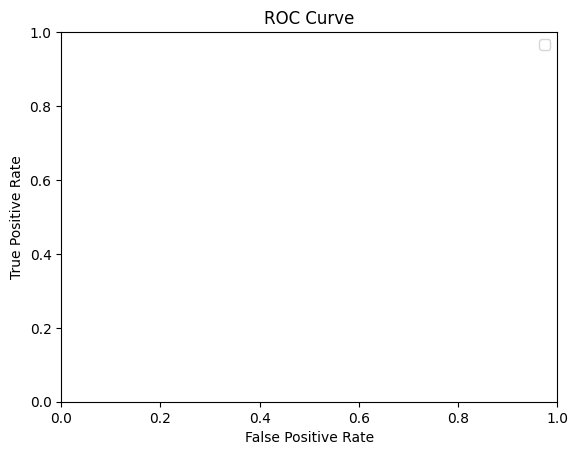

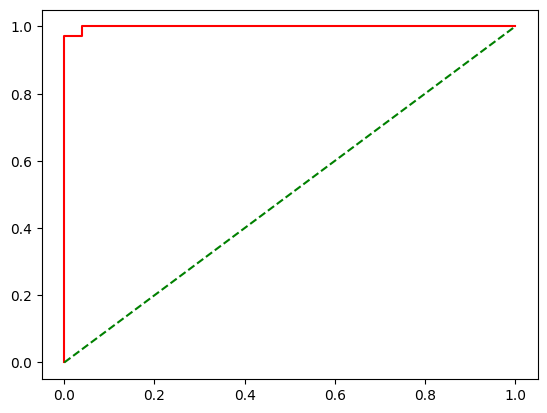

In [ ]:
# customize the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
plot_roc_curve(fpr,tpr)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.9989010989010989

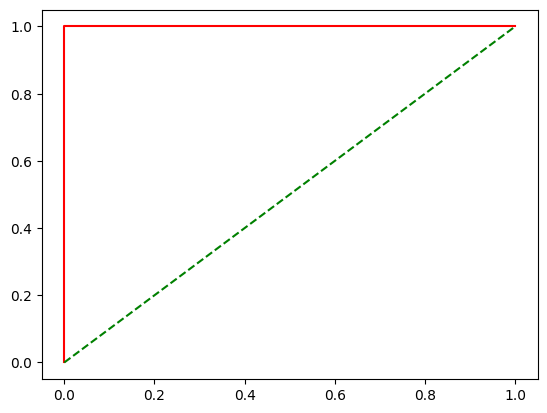

In [ ]:
# plot perfect roc curve and auc score
fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [ ]:
# perfect AUC score
roc_auc_score(y_test,y_test)

1.0

**CONFUSION** **MATRIX**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
in essence giving you an idea of where the model is getting confused.

In [ ]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[26,  0],
       [ 2, 33]])

In [ ]:
# visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds,rownames=["Actual Label"],colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,26,0
1,2,33


In [ ]:
24 +7 + 22 + 8

61

In [ ]:
len(x_test)

61

In [ ]:
len(y_test)

61

<Axes: xlabel='Predicted Label', ylabel='Actual Label'>

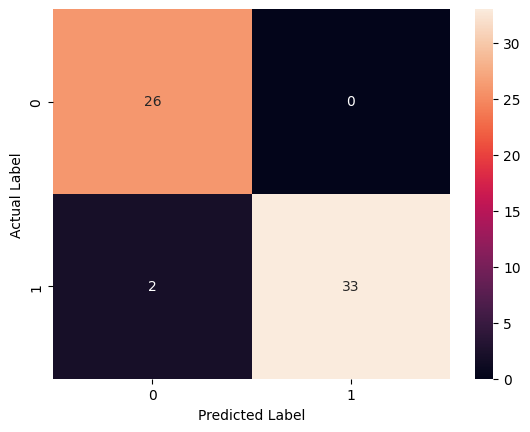

In [ ]:
# make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns
sns.heatmap(pd.crosstab(y_test,y_preds,rownames=["Actual Label"],colnames=["Predicted Label"]),annot=True)


**classification** **report**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       1.00      0.94      0.97        35

    accuracy                           0.97        61
   macro avg       0.96      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



In [ ]:
def plot_conf_mat(conf_mat):
  """
  plots a confusion matrix using seaborn's heatmap()
  """
  fig, ax = plt.subplots(figsize=(3, 3))
  ax = sns.heatmap(conf_mat, annot=True, cbar=False)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label');
  plot_conf_mat(conf_mat)

In [ ]:
# where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case
disease_preds = np.zeros(10000) # model predicts every case as 0
pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True)) # Capitalize the F in Dataframe

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


#### REGRESSION MODEL EVALUATION METRICS

In [ ]:
# 1. R^2 or coefficient of determination
# 2. mean absolute error
# 3. mean squared error
# 4.root mean squared error
# 5.mean absolute percentage error

R^2compares_your_models_predictions_to_the_mean_of_the_target

In [ ]:
import pandas as pd # import pandas

boston_df = pd.read_csv('/content/sample_data/BostonHousing.csv') # read in the dataframe using pandas

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/BostonHousing.csv'

In [ ]:
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
import pandas as pd # import pandas
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # import the train_test_split function
import numpy as np # import numpy

np.random.seed(42)
x = boston_df.drop("MEDV",axis=1) # drop the MEDV column, which corresponds to the target variable
y = boston_df["MEDV"] # assign the MEDV column to the target variable y
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) # split data into training and testing sets
model=RandomForestRegressor() # create an instance of the RandomForestRegressor model
model.fit(x_train,y_train) # fit the model to the training data
model.score(x_test,y_test) # evaluate the model on the testing data

NameError: name 'boston_df' is not defined

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,model.predict(x_test))

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

MEAN ABSOLUTE ERROR MAE

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
# Assuming boston_df is already loaded

np.random.seed(42)
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
# model.score(x_test,y_test)

y_preds=model.predict(x_test)
mae = mean_absolute_error(y_test,y_preds) # Assign the result to mae

mae # Now you can access the calculated mae

0.23754098360655734

MEAN SQUARED ERROR MSE

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Assuming boston_df is already loaded

np.random.seed(42)
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor() # Define the model
model.fit(x_train,y_train) # Train the model


from sklearn.metrics import mean_squared_error
y_preds=model.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
mse

0.12204426229508197

#### finally using the scoring parameter

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
clf=RandomForestClassifier()
cv_acc=cross_val_score(clf,x,y,cv=5,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [ ]:
# cross validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [ ]:
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision

array([0.76315789, 0.90322581, 0.83870968, 0.79411765, 0.74358974])

In [ ]:
np.mean(cv_precision)

0.8085601538512754

In [ ]:
# Recall
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall

array([0.87878788, 0.84848485, 0.78787879, 0.78787879, 0.90909091])

In [ ]:
np.mean(cv_recall)

0.8424242424242424

In [ ]:
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
np.mean(cv_f1)

0.841476533416832

## How about regression model?

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
clf=RandomForestRegressor()
cv_r2=cross_val_score(clf,x,y,cv=5,scoring=None)
cv_r2

array([0.        , 0.        , 0.32184393, 0.        , 0.        ])

In [ ]:
np.random.seed(42)
cv_r2=cross_val_score(clf,x,y,cv=5,scoring="r2")
cv_r2

array([0.        , 0.        , 0.32184393, 0.        , 0.        ])

In [ ]:
## Mean Absolute error
cv_mae=cross_val_score(clf,x,y,cv=5,scoring="neg_mean_absolute_error")
cv_mae

array([-0.32934426, -0.36606557, -0.25278689, -0.3235    , -0.42633333])

In [ ]:
## Mean square error
cross_mse=cross_val_score(clf,x,y,cv=5,scoring="neg_mean_squared_error")
cross_mse

array([-0.15701967, -0.20489344, -0.14015738, -0.168075  , -0.28709833])

In [ ]:
np.mean(cross_mse)

-0.19144876502732244

In [ ]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
# make some predictions
y_preds=clf.predict(x_test)


In [ ]:
# evaluate the classifier
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test,y_preds)*100:.2f}%")
print(f"Recall: {recall_score(y_test,y_preds)*100:.2f}%")
print(f"F1: {f1_score(y_test,y_preds)*100:.2f}%")

Classifier metrics on the test set:
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


Regresssion evaluation functions

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
x= heartdisease_df.drop("target",axis=1)
y= heartdisease_df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)

In [ ]:
# Make predictions using our regression model
model.predict(x_test)


array([0.03, 0.58, 0.47, 0.13, 0.81, 0.86, 0.73, 0.03, 0.01, 0.45, 0.95,
       0.21, 0.85, 0.12, 0.89, 0.99, 0.99, 0.05, 0.07, 0.01, 0.6 , 0.05,
       0.88, 0.66, 0.63, 0.52, 0.83, 0.82, 0.06, 0.92, 0.09, 0.02, 0.  ,
       0.27, 0.54, 0.03, 0.39, 0.83, 0.62, 0.97, 0.91, 0.88, 0.95, 0.54,
       0.68, 0.18, 0.75, 1.  , 0.13, 0.  , 0.08, 0.19, 0.89, 0.76, 0.2 ,
       0.06, 0.52, 0.99, 0.03, 0.  , 0.07])

In [ ]:
# evaluate the regression model
print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test,model.predict(x_test))*100:.2f}%")
print(f"MAE: {mean_absolute_error(y_test,model.predict(x_test))*100:.2f}%")
print(f"MSE: {mean_squared_error(y_test,model.predict(x_test))*100:.2f}%")

Regression model metrics on the test set:
R^2: 51.06%
MAE: 23.75%
MSE: 12.20%


## IMPROVING A MODEL

first predictions= baseline predictions

first model = baseline model







from a data perspective

could we collect more data? ( better option)

could we improve our data?

```
# This is formatted as code
```



from a model perspective

is there a better model we could use?

could we improve the currentmodel?

parameters = model find these paterns in data

hyperparameters = settings on a model you can adjust to improve its abillity to find patterns

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

three ways to adjust hyperparameters

by hand

randomly with randomsearchCV

exhaustively with gridsearchcv

In [ ]:
#### tuning hyperparameters by hand
lets make 3 sets , training, validation and test
we are going to adjust the following
max_depth
min_samples_split
min_samples_leaf
n_estimators
max_features


In [ ]:
def evaluate_preds(y_true,y_preds):
  """
  performs evaluation comparison on y_true labels vs y_pred labels
  """
  accuracy=accuracy_score(y_true,y_preds)
  precision=precision_score(y_true,y_preds)
  recall=recall_score(y_true,y_preds)
  f1=f1_score(y_true,y_preds)
  metric_dict={"accuracy":round(accuracy,2),
               "precision":round(precision,2),
               "recall":round(recall,2),
               "f1":round(f1,2)}
  print(f"accuracy:{accuracy*100:.2f}%") # This line and the following 3 lines were incorrectly indented
  print(f"precision:{precision*100:.2f}%")
  print(f"recall:{recall*100:.2f}%")
  print(f"f1:{f1*100:.2f}%")
  return metric_dict

In [ ]:
import pandas as pd # Import the pandas library and give it the alias 'pd'

heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)


In [ ]:
# shuffle the data
heart_disease_shuffled=heart_disease.sample(frac=1)

In [ ]:
# split into X & Y
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]


In [ ]:
# import the required modules
from sklearn.metrics import accuracy_score, precision_score, recall_score

def evaluate_preds(y_true, y_preds):
  """
  performs evaluation comparison on y_true labels vs y_pred labels
  """
  accuracy=accuracy_score(y_true,y_preds)
  precision=precision_score(y_true,y_preds)
  recall=recall_score(y_true,y_preds)
  return {"accuracy":round(accuracy,2),
         "precision":round(precision,2),
         "recall":round(recall,2)}

In [ ]:
# SPLIT the data into train,validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
x_train,y_train=x[:train_split],y[:train_split]
x_valid,y_valid=x[train_split:valid_split],y[train_split:valid_split]
x_test,y_test=x[valid_split:],y[valid_split:]
len(x_train),len(x_valid),len(x_test)

(212, 45, 46)

In [ ]:
clf = RandomForestClassifier()
clf.get_params()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
# make predictions
y_preds=clf.predict(x_valid)

In [ ]:
# evaluate the classifier on validation set
baseline_metrics=evaluate_preds(y_valid,y_preds)
baseline_metrics

{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88}

In [ ]:
import numpy as np # imports the numpy library and assigns it to the alias np

np.random.seed(42) # now np is defined and the code will execute
for i in range(10,100,10):
  print(f"Trying model with {i} estimators...")

Trying model with 10 estimators...
Trying model with 20 estimators...
Trying model with 30 estimators...
Trying model with 40 estimators...
Trying model with 50 estimators...
Trying model with 60 estimators...
Trying model with 70 estimators...
Trying model with 80 estimators...
Trying model with 90 estimators...


In [ ]:
np.random.seed(42)
for i in range(10,100,10):
  print(f"Trying model with {i} estimators...")

Trying model with 10 estimators...
Trying model with 20 estimators...
Trying model with 30 estimators...
Trying model with 40 estimators...
Trying model with 50 estimators...
Trying model with 60 estimators...
Trying model with 70 estimators...
Trying model with 80 estimators...
Trying model with 90 estimators...


In [ ]:
np.random.seed(42)


In [ ]:
# create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
# create a second classifier with different hyperparameters
from sklearn.ensemble import RandomForestClassifier # import the RandomForestClassifier model
clf_2 = RandomForestClassifier(n_estimators=100) # create an instance of the model and assign it to clf_2
clf_2.fit(x_train,y_train) # train the model

RandomForestClassifier()

In [ ]:
# make predictions
y_preds_2=clf_2.predict(x_valid)

In [ ]:
# evaluate the 2nd classifier
clf_2_metrics=evaluate_preds(y_valid,y_preds_2)
clf_2_metrics


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88}

In [ ]:
clf_3 = RandomForestClassifier(n_estimators=100,max_depth=10)
clf_3.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
### hyperparameter tuning with randomizedsearchcv
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 15, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}
np.random.seed(42)


In [ ]:
# split into x & y
x= heart_disease_shuffled.drop("target",axis=1)
y= heart_disease_shuffled["target"]

In [ ]:
# import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# split into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
# split into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
# instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

In [ ]:
# import the necessary module
from sklearn.model_selection import RandomizedSearchCV

#setup randomizedsearchcv
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,#number_of_models_to_try
                            cv=5,
                            verbose=2)

In [ ]:
# Fit randomizedsearchcv version of clf
rs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_es

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

In [ ]:
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [ ]:
# make predictions with the best hyperparameters
rs_y_preds=rs_clf.predict(x_test)


In [ ]:
# evaluate the predictions
rs_metrics=evaluate_preds(y_test,rs_y_preds)
rs_metrics

{'accuracy': 0.8, 'precision': 0.84, 'recall': 0.79}

## hyperparameter tuning wih GridsearchCV

In [ ]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 15, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [ ]:
grid_2={"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 15, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

In [ ]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)

In [ ]:
# split into x & y
x= heart_disease_shuffled.drop("target",axis=1)
y= heart_disease_shuffled["target"]


In [ ]:
# split into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
# instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

In [ ]:
# setup GridsearchCV
gs_clf=GridSearchCV(estimator=clf,
                    param_grid=grid_2,
                    cv=5,
                    verbose=2)

In [ ]:
# instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# setup GridsearchCV
gs_clf=GridSearchCV(estimator=clf,
                    param_grid=grid_2, # make sure grid_2 is defined
                    cv=5,
                    verbose=2)

# fit the GridsearchCV version of clf
gs_clf.fit(x_train,y_train)

# Access best parameters after fitting the model
gs_clf.best_params_

# Make predictions using the best model found by GridSearchCV
gs_y_preds=gs_clf.predict(x_test)

# evaluate the predictions
gs_metrics=evaluate_preds(y_test,gs_y_preds)

In [ ]:
# import the required modules
from sklearn.metrics import accuracy_score, precision_score, recall_score

def evaluate_preds(y_true, y_preds):
  """
  performs evaluation comparison on y_true labels vs y_pred labels
  """
  accuracy=accuracy_score(y_true,y_preds)
  precision=precision_score(y_true,y_preds)
  recall=recall_score(y_true,y_preds)
  return {"accuracy":round(accuracy,2),
         "precision":round(precision,2),
         "recall":round(recall,2)}

lets compare our different models metrics

####SAVING AND LOADING TRAINED MACHINE LEARNING MODELS

TWO WAYS TO SAVE AND LOAD MACHINE LEARNING MODELS

1 with pythons pickle module

2 with the joblib module

PICKLE

In [ ]:
import pickle

In [ ]:
# import the necessary modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# define a random forest classifier
rf = RandomForestClassifier()
# define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
}
# define the grid search object
gs_clf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
# fit the grid search object to the data
# gs_clf.fit(X, y) # Assuming you have features X and target y

# save the model to a file
import pickle
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl","wb"))

In [ ]:
# load a saved model
loaded_model=pickle.load(open("gs_random_forest_model_1.pkl","rb"))

In [ ]:
# make some predictions
# Ensure x_test is defined and contains the correct data for prediction
x_test = ... # Load or define x_test with your test data
pickle_y_preds=loaded_model.predict(x_test)
evaluate_preds(y_test,pickle_y_preds)

2. **JOBLIB**

In [ ]:
from joblib import dump,load

In [ ]:
# save model to file
dump(gs_clf,filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [ ]:
# import a saved joblib model
loaded_joblib_model=load(filename="gs_random_forest_model_1.joblib")

In [ ]:
# make and evaluate joblib predictions
joblib_y_preds=loaded_joblib_model.predict(x_test)
evaluate_preds(y_test,joblib_y_preds)

**PUTTING** **IT** **ALL** **TOGETHER**

In [ ]:
# import the pandas module
import pandas as pd

# read the csv file into a pandas DataFrame
data = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")

# print some info
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [ ]:
data.dtypes

,0
Make,object
Colour,object
Odometer (KM),float64
Doors,float64
Price,float64


In [ ]:
data.isna().sum()

,0
Make,49
Colour,50
Odometer (KM),50
Doors,50
Price,50


STEPS TO DO ALL IN ONE CELL
1 fill missing data

2 convert data to numbers

3 build a model on the data

In [ ]:
#getting_data_ready

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

In [ ]:
# setup random seed
import numpy as np
np.random.seed(42)

# import data and drop rows with missing labels
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

# define different features and transformer pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

categorical_features=["Make","Colour"]
categorical_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])


# setup the preprocessing steps (fill  missing values, then convert to numbers)
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numerical_transformer, numeric_features)
    ]
)

# create a preprocessing and modelling pipeline
from sklearn.ensemble import RandomForestRegressor
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

In [ ]:
# split data
x = data.drop("Price",axis=1)
y = data["Price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
# fit and score the model
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.21528416466346045

In [ ]:
# its also possible to use gridsearchCV and randomizedsearchCV with our pipeline

In [ ]:
# use gridsearchCV with our regression pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]
}
gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(x_train, y_train)

In [ ]:
gs_model.score(x_test, y_test)